## Exercise 1. Support Vector Machine [10 points]

1. Load the ‘load_breast_cancer’ dataset from sklearn.datasets. Rename the dataset ‘cancer_data.’
2. Explore the data. Look at the shape of the ‘cancer_data.’
3. Create a test and train set. The test set represents 40% of the total dataset.
4. Import the ‘SVM’ module from sklearn to create a support vector classifier in svc() by passing the argument kernel as the linear kernel. Name the classifier ‘cls.’
5. Evaluate the model by providing separately the accuracy, precision, recall, and the classification report. What are your conclusions?
6. Using kernel=’rbf’, C=[0.1,1, 100], ‘epsilon’=[0.1,0.5,1] and gamma=[1,3,5], what are the best parameters?
7. What does C, epsilon, and gamma represent? What happens if you reduce gamma?

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
#ref: https://stackoverflow.com/questions/44340445/loading-sklearn-cancer-dataset-into-pandas-dataframe

#Load the ‘load_breast_cancer’ dataset from sklearn.datasets. Rename the dataset ‘cancer_data.’

cancer_data = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                           columns= np.append(cancer['feature_names'], ['target']))

In [5]:
#Explore the data. Look at the shape of the ‘cancer_data.’

cancer_data.shape

(569, 31)

In [6]:
cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [7]:
cancer_data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
#Create a test and train set. The test set represents 40% of the total dataset.

x_train, x_test, y_train, y_test = train_test_split(cancer_data[cancer_data.columns[:-1]], cancer_data.target, test_size=0.40, random_state=0)

In [9]:
#Import the ‘SVM’ module from sklearn to create a support vector classifier in svc() by passing the argument kernel as the linear kernel. Name the classifier ‘cls.’

cls = LinearSVC()
cls.fit(x_train, y_train)
prediction = cls.predict(x_test)
scores = cross_val_score(cls, cancer_data[cancer_data.columns[:-1]], cancer_data.target, cv=5)

accuracy_all=[]
cvs_all=[]
accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

LinearSVC Accuracy: 87.28%


In [10]:
#Evaluate the model by providing separately the accuracy, precision, recall, and the classification report.

print("accuracy : {:.2f}".format(accuracy_score(y_test, prediction)))
print("precision : {:.2f}".format(precision_score(y_test, prediction)))
print("recall : {:.2f}".format(recall_score(y_test, prediction)))
print("f1_score: {:.2f}".format(f1_score(y_test, prediction)))

accuracy : 0.87
precision : 0.83
recall : 1.00
f1_score: 0.91


In [11]:
print("classification report:")
print(classification_report(y_test,prediction))

classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.65      0.79        83
         1.0       0.83      1.00      0.91       145

    accuracy                           0.87       228
   macro avg       0.92      0.83      0.85       228
weighted avg       0.89      0.87      0.87       228



What are your conclusions?

The model has 87% accuracy, 83% precision, and 100% recall. The recall higher than precision. This means that the model is dependable.

In [12]:
#Using kernel=’rbf’, C=[0.1,1, 100], ‘epsilon’=[0.1,0.5,1] and gamma=[1,3,5]

param_grid = {'C':[0.1,1,100],'epsilon':[0.1,0.5,1],'gamma':[1,3,5]}

In [13]:
grid = GridSearchCV(SVR(kernel='rbf'),param_grid,refit=True,verbose=3)

In [14]:
pred = cls.predict(x_test)

In [15]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=0.1, epsilon=0.1, gamma=1 .....................................
[CV] ........ C=0.1, epsilon=0.1, gamma=1, score=-0.151, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=1 .....................................
[CV] ........ C=0.1, epsilon=0.1, gamma=1, score=-0.183, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=1 .....................................
[CV] ........ C=0.1, epsilon=0.1, gamma=1, score=-0.208, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=1 .....................................
[CV] ........ C=0.1, epsilon=0.1, gamma=1, score=-0.235, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=1 .....................................
[CV] ........ C=0.1, epsilon=0.1, gamma=1, score=-0.235, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=3 .....................................
[CV] ........ C=0.1, epsilon=0.1, gamma=3, score=-0.151, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=3 .....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, epsilon=0.1, gamma=5, score=-0.208, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=5 .....................................
[CV] ........ C=0.1, epsilon=0.1, gamma=5, score=-0.235, total=   0.0s
[CV] C=0.1, epsilon=0.1, gamma=5 .....................................
[CV] ........ C=0.1, epsilon=0.1, gamma=5, score=-0.235, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=1 .....................................
[CV] ........ C=0.1, epsilon=0.5, gamma=1, score=-0.102, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=1 .....................................
[CV] ........ C=0.1, epsilon=0.5, gamma=1, score=-0.075, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=1 .....................................
[CV] ........ C=0.1, epsilon=0.5, gamma=1, score=-0.059, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=1 .....................................
[CV] ........ C=0.1, epsilon=0.5, gamma=1, score=-0.044, total=   0.0s
[CV] C=0.1, epsilon=0.5, gamma=1 .....................................
[CV] .

[CV] ............ C=1, epsilon=1, gamma=3, score=-0.059, total=   0.0s
[CV] C=1, epsilon=1, gamma=3 .........................................
[CV] ............ C=1, epsilon=1, gamma=3, score=-0.044, total=   0.0s
[CV] C=1, epsilon=1, gamma=3 .........................................
[CV] ............ C=1, epsilon=1, gamma=3, score=-0.044, total=   0.0s
[CV] C=1, epsilon=1, gamma=5 .........................................
[CV] ............ C=1, epsilon=1, gamma=5, score=-0.102, total=   0.0s
[CV] C=1, epsilon=1, gamma=5 .........................................
[CV] ............ C=1, epsilon=1, gamma=5, score=-0.075, total=   0.0s
[CV] C=1, epsilon=1, gamma=5 .........................................
[CV] ............ C=1, epsilon=1, gamma=5, score=-0.059, total=   0.0s
[CV] C=1, epsilon=1, gamma=5 .........................................
[CV] ............ C=1, epsilon=1, gamma=5, score=-0.044, total=   0.0s
[CV] C=1, epsilon=1, gamma=5 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 100], 'epsilon': [0.1, 0.5, 1],
                         'gamma': [1, 3, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [16]:
#what are the best parameters?

print(grid.best_params_)

{'C': 1, 'epsilon': 0.1, 'gamma': 1}


In [17]:
print(grid.best_estimator_)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


What does C, epsilon, and gamma represent? What happens if you reduce gamma?

C is the cost of misclassification as correctly stated by Dima.

A large C gives you low bias and high variance. Low bias because you penalize the cost of missclasification a lot.
A small C gives you higher bias and lower variance.

Epsilon specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

Gamma is the parameter of a Gaussian Kernel (to handle non-linear classification). 

Low gamma means that the Gaussian has a very large variance.

#ref: https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine
#ref: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
#ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
#ref: https://www.researchgate.net/post/Does_the_choice_of_gamma_value_has_any_serious_effect_on_model_performance_in_SVM_classification

## Exercise 2. Naïve Bayes [10 points]
1. Load the ‘iris’ dataset from sklearn.datasets.
2. Define the feature matrix X and the target vector y
3. Split X and y into the training and test sets. Use 40% for the test set.
4. Use the training set to train the Naïve Bayes model using GaussianNB.
5. Make predictions using the test set.
6. Compare actual target values (y_test) with predicted target values (y_pred) in percent.
7. What are your conclusions?
8. What are the other types of Naïve Bayes classifiers?

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline
sns.set()

In [19]:
#Load the ‘iris’ dataset from sklearn.datasets

from sklearn.datasets import load_iris

In [20]:
iris = sns.load_dataset("iris")
iris1 = datasets.load_iris()

In [21]:
print(iris1.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
#ref: https://www.kaggle.com/nageshnaik/iris-dataset-classfication-using-naive-bayes

#Split X and y into the training and test sets. Use 40% for the test set

x_train, x_test, y_train, y_test = train_test_split(iris[iris.columns[:-1]], iris.species, test_size=0.4, random_state=0)

In [24]:
#Use the training set to train the Naïve Bayes model using GaussianNB

nvclassifier = GaussianNB()
nvclassifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
#Make predictions using the test set

y_pred_test = nvclassifier.predict(x_test)
print(y_pred_test)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'virginica']


In [26]:
compare_naive_results_test = pd.DataFrame({'Actual': y_test.ravel(),
                                      'Predicted': y_pred_test.ravel()})
compare_naive_results_test.head(10)

,Actual,Predicted
0,virginica,virginica
1,versicolor,versicolor
2,setosa,setosa
3,virginica,virginica
4,setosa,setosa
5,virginica,virginica
6,setosa,setosa
7,versicolor,versicolor
8,versicolor,versicolor
9,versicolor,versicolor


In [27]:
#Compare actual target values (y_test) with predicted target values (y_pred) in percent

cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[16  0  0]
 [ 0 23  0]
 [ 0  4 17]]


In [28]:
i = cm.shape
truePred = 0
falsePred = 0

for row in range(i[0]):
    for j in range(i[1]):
        if row == j:
            truePred +=cm[row,j]
        else:
            falsePred += cm[row,j]

In [29]:
print('True predictions: ', truePred)
print('\nFalse predictions', falsePred)
print('\nAccuracy of the Naive Bayes Clasification is: ', truePred/(cm.sum()))

True predictions:  56

False predictions 4

Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


7. What are your conclusions?

The Naïve Bayes model 93% accurate. For problems with a small amount of training data, it can achieve better results than other classifiers because it has a low propensity to overfit. Training is quick, and consists of computing the priors and the likelihoods.

#ref: https://towardsdatascience.com/the-naive-bayes-classifier-e92ea9f47523

#ref: https://www.educative.io/edpresso/what-are-naive-bayes-classifiers
#ref: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

8. What are the other types of Naïve Bayes classifiers?

Gaussian Naive Bayes Classifier: It is used in classification and it assumes that features follow a normal distribution

Multinomial Naive Bayes Classifier: used when features follow a multinomial distribution.

Bernoulli Naive Bayes classifier: used when features are of the boolean type.

## Exercise 3. Logistic Regression [20 points]

### 1. When does logistic regression become a classification technique?
#ref: http://logisticregressionanalysis.com/33-when-to-use-logistic-regression/

Logistic regression becomes a classification technique when your output variable takes on only two values (binary) such as yes/no, defective/non-defective, success/failure, and so on.

### 2. Based on the number of categories, what are the different types of logistic regression models?
#ref: https://www.edureka.co/community/46062/different-types-of-logistic-regression

There are three main types of logistic regression:

1. binomial: target variable can have only 2 possible types: “0” or “1” which may represent “win” vs “loss”, “pass” vs “fail”, “dead” vs “alive”, etc.
2. multinomial: target variable can have 3 or more possible types which are not ordered(i.e. types have no quantitative significance) like “disease A” vs “disease B” vs “disease C”.
3. ordinal: it deals with target variables with ordered categories. For example, a test score can be categorized as:“very poor”, “poor”, “good”, “very good”. Here, each category can be given a score like 0, 1, 2, 3.

3. From sklearn, import datasets, linear_model, and metrics.
4. Use the ‘load_digits’ dataset from sklearn.
5. Set X as digits.data and y as digits.target
6. Split X and y into training and test sets. Use 40% of the data for the test set.
7. Create the logistic regression object as ‘reg.’
8. Make predictions using the test set.
9. Compare actual response values (y_test) with the predicted response values (y_pred). What is the outcome?

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

#From sklearn, import datasets, linear_model, and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [31]:
#Use the ‘load_digits’ dataset from sklearn

from sklearn.datasets import load_digits
digits = load_digits()

In [32]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [33]:
print('Image Data Shape' , digits.data.shape)

Image Data Shape (1797, 64)


In [34]:
print("Label Data Shape", digits.target.shape)

Label Data Shape (1797,)


In [35]:
#Set X as digits.data and y as digits.target
#Split X and y into training and test sets. Use 40% of the data for the test set

x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [36]:
#Create the logistic regression object as ‘reg’

reg = LogisticRegression(max_iter = 4500)
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#Make predictions using the test set

reg.predict(x_test[0].reshape(1,-1))

array([2])

In [38]:
reg.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [39]:
predictions = reg.predict(x_test)

In [40]:
score = reg.score(x_test, y_test)
print(score)

0.9568845618915159


In [41]:
predictions.shape

(719,)

In [42]:
#Compare actual response values (y_test) with the predicted response values (y_pred).

compare_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
compare_results.head(10)

,Actual,Predicted
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6
5,7,7
6,1,1
7,9,9
8,8,8
9,5,5


Text(0.5, 1.0, 'Comparion between actual and pridicted values')

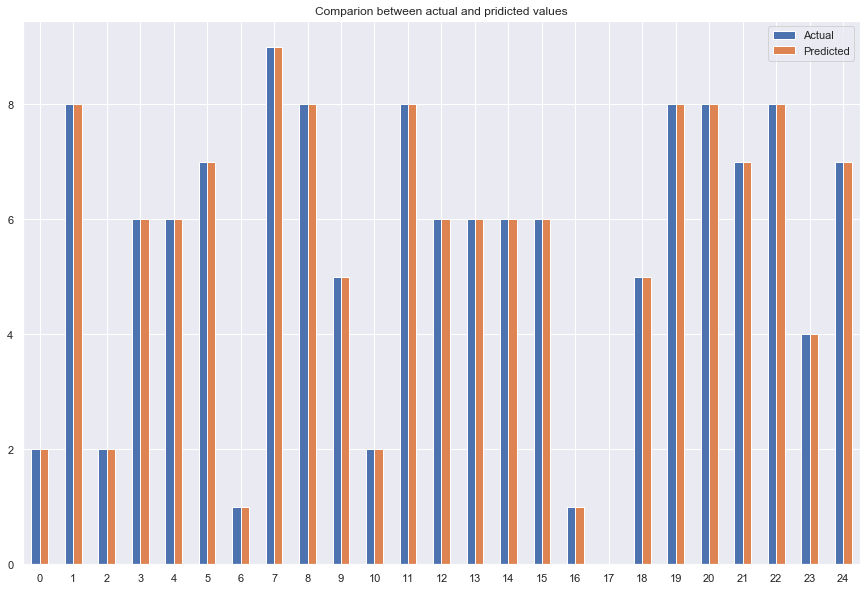

In [43]:
compare_results2 = compare_results.head(25)
compare_results2.plot(kind='bar',figsize=(15,10), rot=0)
plt.title('Comparion between actual and pridicted values')

What is the outcome?

The model is 95% accurate.

## Exercise 4. Regression Models [40 points]
1. Use the ‘diamonds.csv’ dataset from the Data File folder in Blackboard.
2. Import the ‘pandas’, ‘numpy’, ‘seaborn’, ‘train_test_split’, ‘GridSearchCV’, ‘linear_model’, ‘Ridge’, ‘Lasso’, ‘RandomForestRegression’, ‘StandardScaler’, and ‘mean_squared_error’, among other packages.
3. Represent the variables as catplots in seaborn. What is issue? What should you do to make sure you can properly evaluate the impact of each variable on the target?
4. Drop the ‘Unnamed:0’ column, check the dataset for null values, provide the dataset info, and shape of target and feature variables. Make sure there are not any null values. If so, eliminate them.
5. Once null values are removed, uses the ‘missingno’ library to visualize missing data. What are your conclusions?
6. Describe the data. Make sure there are no rows for the x, y, and z variables with a zero value. If there are, remove them.
7. Provide a correlation heatmap. What are your conclusions? Explain in a few words what correlation measures. How can correlation affect conclusions about the relationship between two or more variables in regression analysis?
8. Use LabelEncoder to create three labels: ‘cut’, ‘color’, and ‘clarity.’
9. Define y as ‘price’ and create a train and test set. The test set represents 20% of the data.
10. Scale the train and test sets using ‘StandardScaler.’
11. Collect the R2_score as R2_Scores = [ ] and the models as models = ['Linear Regression' , 'Lasso Regression' , 'Ridge Regression' , 'RandomForest Regression'] .
12. Run a linear regression model. Provide the accuracy scores (remember: cv=5. Determine the MSE, MAE, RMSE, and r2_score for the y_test and y_pred model. Is the model over- or underfitting? Explain.
13. What is the purpose of cross validation?
14. Repeat question 12 for the Lasso model.
15. Repeat question 12 for the Ridge Regression model.
16. Repeat question 12 for the Random Forest Regression model.
17. Using GridSearchCV such that 

no_of_test=[100] 

params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}

determine the Score and R2. Is the outcome different from the model outcomes in question 16?
18. Provide a table (DataFrame) that compares the R2_Scores from the different models using a data frame. How do you interpret the coefficient of determination? What does it represent?
19. Create a bar plot to show the R2_Scores by model.
20. How do you think the linear regression model performed?
21. Did penalized models perform better than others? Explain the logic behind Ridge and Lasso regression. When do you best use Lasso versus Ridge regression?

In [44]:
#Use the ‘diamonds.csv’ dataset from the Data File folder in Blackboard.
#Import the ‘pandas’, ‘numpy’, ‘seaborn’, ‘train_test_split’, ‘GridSearchCV’, ‘linear_model’, ‘Ridge’, ‘Lasso’, ‘RandomForestRegression’, ‘StandardScaler’, and ‘mean_squared_error’, among other packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
import missingno as msno
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import math
from math import sqrt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [45]:
data_diamond = pd.read_csv("diamonds.csv")
data_diamond

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


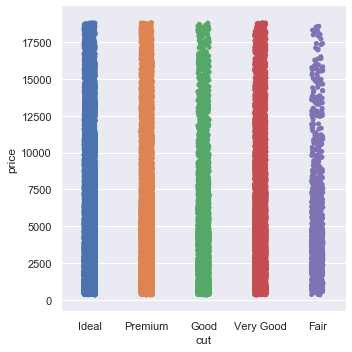

In [46]:
#Represent the variables as catplots in seaborn. 

sns.catplot(x='cut',y='price',data=data_diamond)

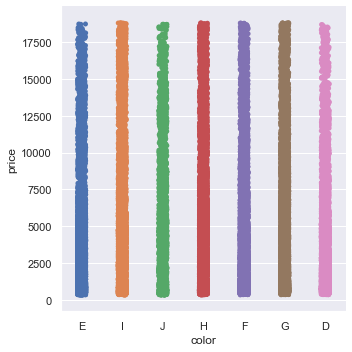

In [47]:
sns.catplot(x='color',y='price',data=data_diamond)

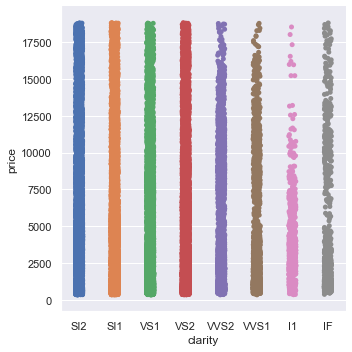

In [48]:
sns.catplot(x='clarity',y='price',data=data_diamond)

What is issue?
What should you do to make sure you can properly evaluate the impact of each variable on the target?

Catplots are particularly used categorical variables and it cannot be used for numerical variables.

We should convert categorical data to numerical data.

In [49]:
#Drop the ‘Unnamed:0’ column, check the dataset for null values,
#provide the dataset info, and shape of target and feature variables.
#Make sure there are not any null values. If so, eliminate them.

data_diamond = data_diamond.drop('Unnamed: 0',axis=1)
data_diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [50]:
data_diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [51]:
data_diamond.shape

(53940, 10)

In [52]:
data_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [53]:
data_diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


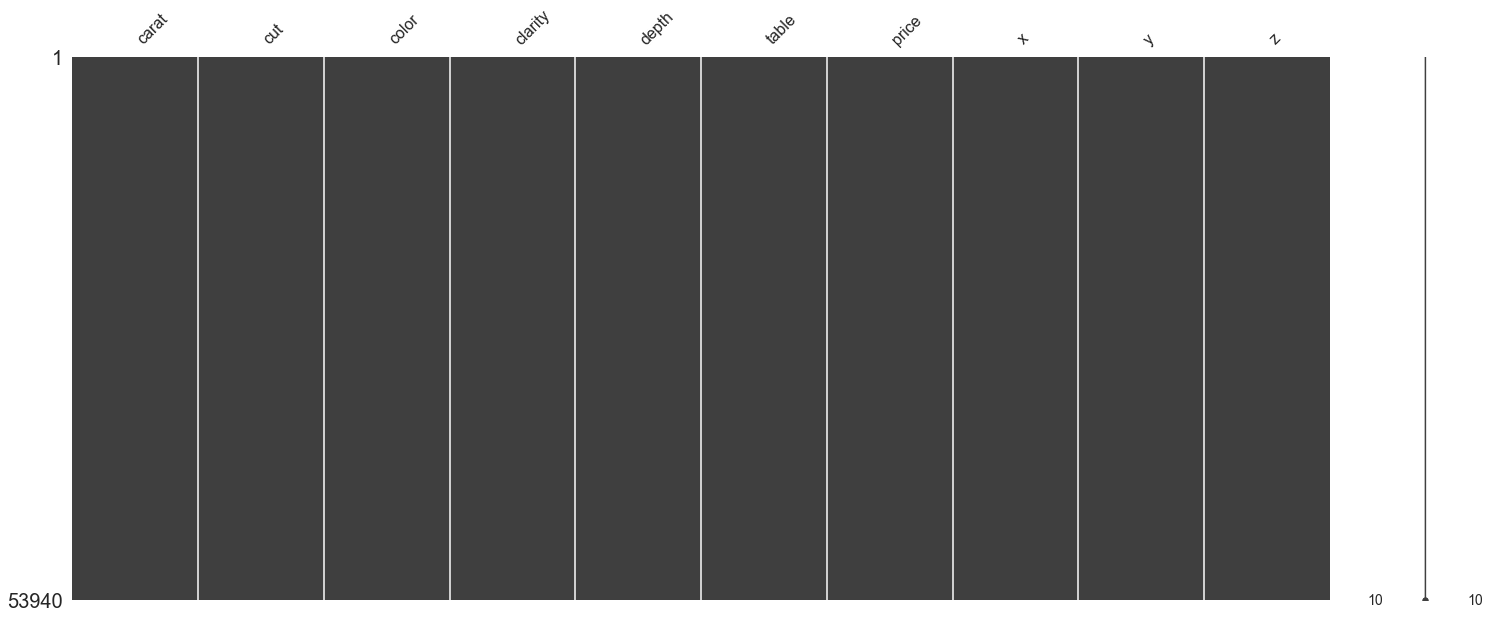

In [54]:
#Once null values are removed, uses the ‘missingno’ library to visualize missing data.

msno.matrix(data_diamond.isnull())

What are your conclusions?

There are no null values same number of records under each column in the data frame.

In [55]:
#Describe the data.

data_diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [56]:
#ref: https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

#Make sure there are no rows for the x, y, and z variables with a zero value.
#If there are, remove them.

indexNames = data_diamond[ data_diamond['x'] == 0 ].index
data_diamond.drop(indexNames , inplace=True)

indexNames1 = data_diamond[ data_diamond['y'] == 0 ].index
data_diamond.drop(indexNames1 , inplace=True)

indexNames2 = data_diamond[ data_diamond['z'] == 0 ].index
data_diamond.drop(indexNames2 , inplace=True)

In [57]:
data_diamond.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


[Text(0, 0.5, 'carat'),
 Text(0, 1.5, 'depth'),
 Text(0, 2.5, 'table'),
 Text(0, 3.5, 'price'),
 Text(0, 4.5, 'x'),
 Text(0, 5.5, 'y'),
 Text(0, 6.5, 'z')]

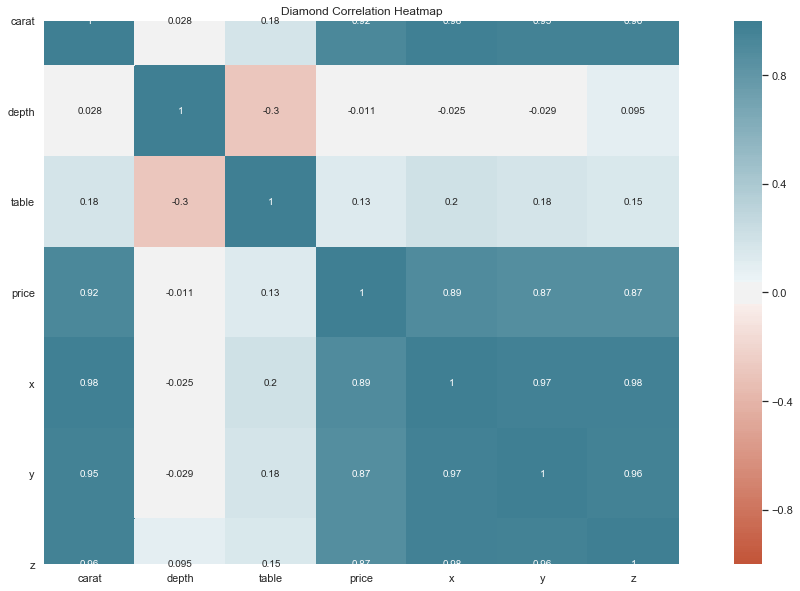

In [58]:
#ref: https://www.kaggle.com/danielmarrama/diamond-exploratory-analysis-and-visualizations

#Provide a correlation heatmap.

corr = data_diamond.corr()
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True,annot=True)
plt.title("Diamond Correlation Heatmap")

ax.set_yticklabels(ax.get_yticklabels(),rotation=0,horizontalalignment='right')

What are your conclusions? 
Explain in a few words what correlation measures.
How can correlation affect conclusions about the relationship between two or more variables in regression analysis?


Correlation coefficients are measures of association between two (or more) variables. Correlation is a measure of association that tests whether a relationship exists between two variables. It indicates both the strength of the association and its direction (direct or inverse).

This applies only for numerical values.

#ref: https://web.csulb.edu/~msaintg/ppa696/696corrl.htm

Price of the diamond is negatively corelated by the depth of the diamond.

Price of the diamond is positively corelated with the carat of the diamond.

In [59]:
#Use LabelEncoder to create three labels: ‘cut’, ‘color’, and ‘clarity.’

label_encoder = preprocessing.LabelEncoder()
data_diamond['cut']= label_encoder.fit_transform(data_diamond['cut']) 
data_diamond['color']=label_encoder.fit_transform(data_diamond['color']) 
data_diamond['clarity']=label_encoder.fit_transform(data_diamond['clarity']) 

In [60]:
data_diamond['cut']

0        2
1        3
2        1
3        3
4        1
        ..
53935    2
53936    1
53937    4
53938    3
53939    2
Name: cut, Length: 53920, dtype: int32

In [61]:
data_diamond['color']

0        1
1        1
2        1
3        5
4        6
        ..
53935    0
53936    0
53937    0
53938    4
53939    0
Name: color, Length: 53920, dtype: int32

In [62]:
data_diamond['clarity']

0        3
1        2
2        4
3        5
4        3
        ..
53935    2
53936    2
53937    2
53938    3
53939    3
Name: clarity, Length: 53920, dtype: int32

In [63]:
#Define y as ‘price’ and create a train and test set. The test set represents 20% of the data.

x = data_diamond.drop('price',axis=1)
y = data_diamond['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [64]:
#Scale the train and test sets using ‘StandardScaler.’

sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(data_diamond[['carat','depth','table','price','x','y','z']]),columns=['carat','depth','table','price','x','y','z'],index=data_diamond.index)

In [65]:
numericals.head()

,carat,depth,table,price,x,y,z
0,-1.198204,-0.174203,-1.099725,-0.904132,-1.591573,-1.539219,-1.580084
1,-1.240417,-1.361090,1.585988,-0.904132,-1.645173,-1.662014,-1.750896
2,-1.198204,-3.385781,3.376463,-0.903881,-1.502241,-1.460280,-1.750896
3,-1.071566,0.454149,0.243131,-0.902125,-1.368242,-1.319943,-1.295396
4,-1.029353,1.082501,0.243131,-0.901875,-1.243176,-1.214690,-1.124583


In [66]:
#Collect the R2_score as R2_Scores = [ ] and the models as models = ['Linear Regression' , 'Lasso Regression' , 'Ridge Regression' , 'RandomForest Regression'] .

R2_Scores=[]
models = ['Linear Regression' , 'Lasso Regression' , 'Ridge Regression' , 'RandomForest Regression']

In [67]:
#Run a linear regression model. Provide the accuracy scores (remember: cv=5.
#Determine the MSE, MAE, RMSE, and r2_score for the y_test and y_pred model.


linearModel=linear_model.LinearRegression()
linearModel.fit(x_train,y_train)
linear_y_predict= linearModel.predict(x_test)
cv_scores_linreg = cross_val_score(linearModel, x_train, y_train, cv=5)

In [68]:
print("Linear Model accuracy: {:.2f}".format((linearModel.score(x_test,y_test)*100)) + "%")
print("Linear Model Mean absolute error: {:.2f}".format(mean_absolute_error(y_test,linear_y_predict)))
print("Linear Model Mean squared error: {:.2f}".format(mean_squared_error(y_test,linear_y_predict)))
print("Linear Model Root Mean squared error: {:.2f}".format(sqrt(mean_squared_error(y_test,linear_y_predict))))

R2_linear = r2_score(y_test,linear_y_predict)
print('Linear Model R Squared: {:.2f}'.format(R2_linear))
R2_Scores.append('{:.3f}'.format(R2_linear))
print('Accuracy: ' ,cv_scores_linreg)

Linear Model accuracy: 88.03%
Linear Model Mean absolute error: 868.24
Linear Model Mean squared error: 1939106.41
Linear Model Root Mean squared error: 1392.52
Linear Model R Squared: 0.88
Accuracy:  [0.86939753 0.88244709 0.89167798 0.8821702  0.88432624]


Is the model over- or underfitting? Explain.

The model is overfitting as the accuracy scores are very close.

In [69]:
MAE=cross_val_score(linearModel, x,y,cv=5, scoring='neg_mean_absolute_error')
MSE=cross_val_score(linearModel, x,y,cv=5, scoring='neg_mean_squared_error')
R2=cross_val_score(linearModel, x,y,cv=5, scoring='r2')

print("Linear Model Mean absolute error: {:.2f}".format(MAE.mean()))
print("Linear Model Mean squared error: {:.2f}".format(MSE.mean()))
print("Linear Model Root Mean squared error: {:.2f}".format(sqrt(abs(MSE.mean()))))
print('Linear Model R Squared: {:.2f}'.format(R2.mean()))

Linear Model Mean absolute error: -1089.32
Linear Model Mean squared error: -2985923.74
Linear Model Root Mean squared error: 1727.98
Linear Model R Squared: -2.58


What is the purpose of cross validation?

Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set also known as test data. 

#ref: https://www.researchgate.net/post/What_is_the_purpose_of_performing_cross-validation

In [70]:
#Repeat question 12 for the Lasso model.

lassoModel = linear_model.Lasso()
lassoModel.fit(x_train, y_train)
lasso_y_predict= lassoModel.predict(x_test)

In [71]:
print("Lasso Model accuracy: {:.2f}".format((lassoModel.score(x_test,y_test)*100)) + "%")
print("Lasso Model Mean absolute error: {:.2f}".format(mean_absolute_error(y_test,lasso_y_predict)))
print("Lasso Model Mean squared error: {:.2f}".format(mean_squared_error(y_test,lasso_y_predict)))
print("Lasso Model Root Mean squared error: {:.2f}".format(sqrt(mean_squared_error(y_test,lasso_y_predict))))

R2_lasso = r2_score(y_test,lasso_y_predict)
print('Lasso Model R Squared: {:.2f}'.format(R2_lasso))
R2_Scores.append('{:.3f}'.format(R2_lasso))

Lasso Model accuracy: 88.11%
Lasso Model Mean absolute error: 869.68
Lasso Model Mean squared error: 1925940.09
Lasso Model Root Mean squared error: 1387.78
Lasso Model R Squared: 0.88


In [72]:
MAE=cross_val_score(lassoModel, x,y,cv=5, scoring='neg_mean_absolute_error')
MSE=cross_val_score(lassoModel, x,y,cv=5, scoring='neg_mean_squared_error')
R2=cross_val_score(lassoModel, x,y,cv=5, scoring='r2')

print("Lasso Model Mean absolute error: {:.2f}".format(MAE.mean()))
print("Lasso Model Mean squared error: {:.2f}".format(MSE.mean()))
print("Lasso Model Root Mean squared error: {:.2f}".format(sqrt(abs(MSE.mean()))))
print('Lasso Model R Squared: {:.2f}'.format(R2.mean()))

Lasso Model Mean absolute error: -1100.78
Lasso Model Mean squared error: -3047120.70
Lasso Model Root Mean squared error: 1745.60
Lasso Model R Squared: -2.57


In [73]:
#Repeat question 12 for the Ridge Regression model.

ridgeModel = linear_model.Ridge()
ridgeModel.fit(x_train, y_train)
ridge_y_predict= ridgeModel.predict(x_test)

In [74]:
print("Ridge Model accuracy: {:.2f}".format((ridgeModel.score(x_test,y_test)*100)) + "%")
print("Ridge Model Mean absolute error: {:.2f}".format(mean_absolute_error(y_test,ridge_y_predict)))
print("Ridge Model Mean squared error: {:.2f}".format(mean_squared_error(y_test,ridge_y_predict)))
print("Ridge Model Root Mean squared error: {:.2f}".format(sqrt(mean_squared_error(y_test,ridge_y_predict))))

R2_ridge = r2_score(y_test,ridge_y_predict)
print('Ridge Model R Squared: {:.2f}'.format(R2_ridge))
R2_Scores.append('{:.3f}'.format(R2_ridge))

Ridge Model accuracy: 88.03%
Ridge Model Mean absolute error: 868.62
Ridge Model Mean squared error: 1938920.56
Ridge Model Root Mean squared error: 1392.45
Ridge Model R Squared: 0.88


In [75]:
MAE=cross_val_score(ridgeModel, x,y,cv=5, scoring='neg_mean_absolute_error')
MSE=cross_val_score(ridgeModel, x,y,cv=5, scoring='neg_mean_squared_error')
R2=cross_val_score(ridgeModel, x,y,cv=5, scoring='r2')

print("Ridge Model Mean absolute error: {:.2f}".format(MAE.mean()))
print("Ridge Model Mean squared error: {:.2f}".format(MSE.mean()))
print("Ridge Model Root Mean squared error: {:.2f}".format(sqrt(abs(MSE.mean()))))
print("Ridge Model R Squared: {:.2f}".format(R2.mean()))

Ridge Model Mean absolute error: -1090.80
Ridge Model Mean squared error: -2993771.50
Ridge Model Root Mean squared error: 1730.25
Ridge Model R Squared: -2.58


In [76]:
#Repeat question 12 for the Random Forest Regression model.

randomForest=RandomForestRegressor()
randomForest.fit(x_train, y_train)
randomForest_y_predict= randomForest.predict(x_test)

In [77]:
print("Random Forest Model accuracy: {:.2f}".format((randomForest.score(x_test,y_test)*100)) + "%")
print("Random Forest Mean absolute error: {:.2f}".format(mean_absolute_error(y_test,randomForest_y_predict)))
print("Random Forest Mean squared error: {:.2f}".format(mean_squared_error(y_test,randomForest_y_predict)))
print("Random Forest Root Mean squared error: {:.2f}".format(sqrt(mean_squared_error(y_test,randomForest_y_predict))))

R2_randomForest = r2_score(y_test,randomForest_y_predict)
print('Random Forest Model R Squared: {:.2f}'.format(R2_randomForest))
R2_Scores.append('{:.3f}'.format(R2_randomForest))

Random Forest Model accuracy: 98.33%
Random Forest Mean absolute error: 262.50
Random Forest Mean squared error: 270616.02
Random Forest Root Mean squared error: 520.21
Random Forest Model R Squared: 0.98


In [78]:
MAE=cross_val_score(randomForest, x,y,cv=5, scoring='neg_mean_absolute_error')
MSE=cross_val_score(randomForest, x,y,cv=5, scoring='neg_mean_squared_error')
R2=cross_val_score(randomForest, x,y,cv=5, scoring='r2')

print("Random Forest Model Mean absolute error: {:.2f}".format(MAE.mean()))
print("Random Forest Model Mean squared error: {:.2f}".format(MSE.mean()))
print("Random Forest Model Root Mean squared error: {:.2f}".format(sqrt(abs(MSE.mean()))))
print("Random Forest Model R Squared: {:.2f}".format(R2.mean()))

Random Forest Model Mean absolute error: -960.07
Random Forest Model Mean squared error: -3419253.73
Random Forest Model Root Mean squared error: 1849.12
Random Forest Model R Squared: 0.28


Using GridSearchCV such that

no_of_test=[100]

params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}

determine the Score and R2. Is the outcome different from the model outcomes in question 16?



In [79]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
gridForest=GridSearchCV(estimator=RandomForestRegressor(), param_grid= params_dict, scoring='r2')

In [80]:
gridResult=gridForest.fit(x_train, y_train)

In [81]:
grid_y_predict=gridForest.predict(x_test)
print("Grid Forest Score {:.2f}".format(gridForest.score(x_test,y_test)))
print("Grid Forest R squared {:.2f}".format(r2_score(y_test, grid_y_predict)))

Grid Forest Score 0.98
Grid Forest R squared 0.98


In [82]:
#Provide a table (DataFrame) that compares the R2_Scores from the different models using a data frame.
#How do you interpret the coefficient of determination?
#What does it represent?

dict={'Model':models,'R2_Score': R2_Scores}
R2score_df= pd.DataFrame(dict)
R2score_df

,Model,R2_Score
0,Linear Regression,0.880
1,Lasso Regression,0.881
2,Ridge Regression,0.880
3,RandomForest Regression,0.983


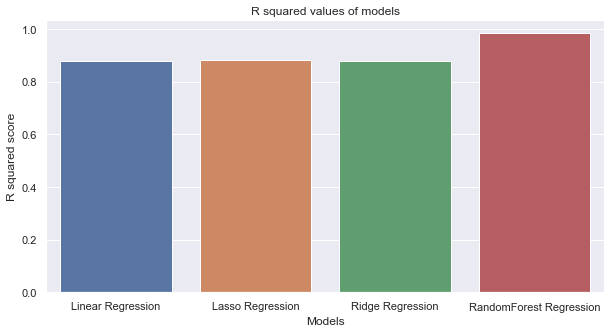

In [83]:
#Create a bar plot to show the R2_Scores by model.

R2score_df['R2_Score']=R2score_df['R2_Score'].astype('float')
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Model', y='R2_Score', data=R2score_df)
plt.xlabel('Models')
plt.ylabel('R squared score')
plt.title('R squared values of models')
plt.show()

How do you think the linear regression model performed?

The linear regression model performed with 88.03% accuracy and 0.88 R2_score.

#Did penalized models perform better than others?
#Explain the logic behind Ridge and Lasso regression.
#When do you best use Lasso versus Ridge regression?


The penalized models i.e. Ridge and Lasso models, performed similar to Linear model with same accuracy and R2_score.

Ridge or lasso are forms of regularized linear regressions. The regularization can also be interpreted as prior in a maximum a posteriori estimation method. Under this interpretation, the ridge and the lasso make different assumptions on the class of linear transformation they infer to relate input and output data. In the ridge, the coefficients of the linear transformation are normal distributed and in the lasso they are Laplace distributed. In the lasso, this makes it easier for the coefficients to be zero and therefore easier to eliminate some of your input variable as not contributing to the output.

There are also some practical considerations. The ridge is a bit easier to implement and faster to compute, which may matter depending on the type of data you have.

If you have both implemented, use subsets of your data to find the ridge and the lasso and compare how well they work on the left out data. The errors should give you an idea of which to use.

#ref: https://stats.stackexchange.com/questions/866/when-should-i-use-lasso-vs-ridge

## Exercise 5. Time Series [20 points]
1. Load the required libraries (pandas, numpy, statsmodels.tsa.seasonal)
2. Use the ‘air_passengers.csv’ file for this exercise from the ‘Data Files’ folder. Make sure that ‘index_col’ is ‘Month’ and ‘parse_dates’ is True.
3. Use ‘ETS Decomposition’ to separate different components of a time series.
4. What is the trend? Is there any seasonality? What are the other components of a time series?
5. Provide the autocorrelation plot using ‘pandas.plotting.’ What information does an autocorrelation plot provide?
6. Provide the residual plot. What does it say? Are the errors Gaussian and centered to zero or not?
7. Provide number of passengers for the predicted and expected values of passengers given the following parameters:

def parser(x): 

    return datetime.strptime('190'+x, '%Y-%m')

X = airline.values

size = int(len(X) * 0.66)

train, test = X[0:size], X[size:len(X)]

history = [x for x in train]

predictions = list()

Use the ARIMA(2,1,2) and remember that the model fit is defined as:

model_fit = model.fit(disp=0)

What is the MSE for the test data?
8. Plot test vs. prediction values.

In [84]:
#Load the required libraries (pandas, numpy, statsmodels.tsa.seasonal)

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt 
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [85]:
#Use the ‘air_passengers.csv’ file for this exercise from the ‘Data Files’ folder. Make sure that ‘index_col’ is ‘Month’ and ‘parse_dates’ is True.

air_passengers = pd.read_csv("air_passengers.csv", sep='\t', index_col = 'Month', parse_dates = True)
air_passengers

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [86]:
air_passengers.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


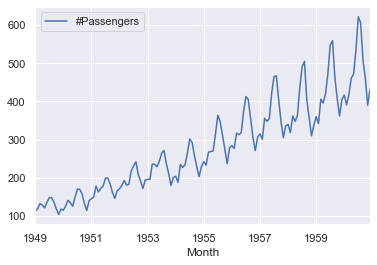

In [87]:
air_passengers.plot()

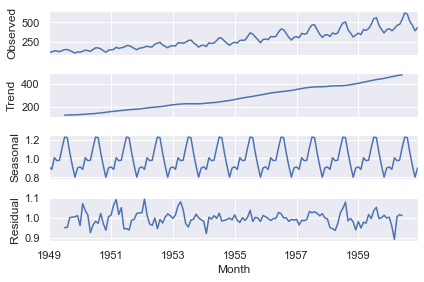

In [88]:
#ref: http://rstudio-pubs-static.s3.amazonaws.com/311446_08b00d63cc794e158b1f4763eb70d43a.html

#Use ‘ETS Decomposition’ to separate different components of a time series.

result = seasonal_decompose(air_passengers, model='multiplicative')
result.plot()
pyplot.show()

#ref: https://towardsdatascience.com/trend-seasonality-moving-average-auto-regressive-model-my-journey-to-time-series-data-with-edc4c0c8284b

What is the trend?

Trend is a general systematic linear or (most often) nonlinear component that changes over time and does not repeat.

The trend is upwards.

#ref: https://machinelearningmastery.com/time-series-seasonality-with-python/

Is there any seasonality?

Yes, there is a seasonality.

#ref: http://www.businessdictionary.com/definition/time-series.html

What are the other components of a time series?

The other components of time series are cyclical and random variations.


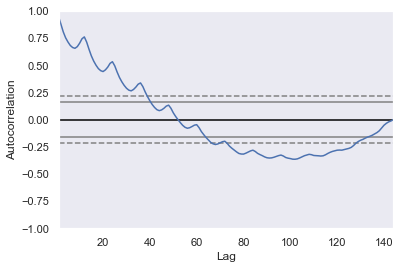

In [89]:
#Provide the autocorrelation plot using ‘pandas.plotting.’

autocorrelation_plot(air_passengers)

What information does an autocorrelation plot provide?

The plot shows there is a correlation between adjacent and near-adjacent observations and the spikes show that there are some irregularities.

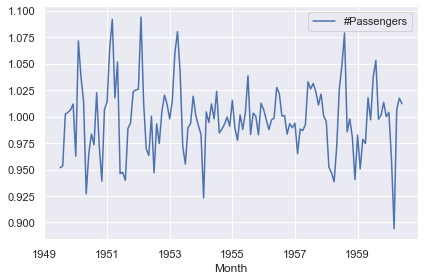

In [90]:
#Provide the residual plot.

residual = result.resid
residual.plot(label ='Residual plot')
plt.legend(loc='best')
plt.tight_layout()

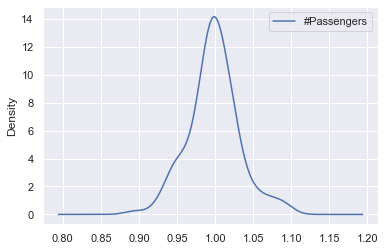

In [91]:
residual.plot(kind='kde')

What does it say? Are the errors Gaussian and centered to zero or not?

The Gaussian Errors are not centered to zero.

Provide number of passengers for the predicted and expected values of passengers given the following parameters:

def parser(x): 

    return datetime.strptime('190'+x, '%Y-%m')

X = airline.values

size = int(len(X) * 0.66)

train, test = X[0:size], X[size:len(X)]

history = [x for x in train]

predictions = list()

Use the ARIMA(2,1,2) and remember that the model fit is defined as:

model_fit = model.fit(disp=0)

What is the MSE for the test data?

In [92]:
#ref: https://machinelearningmastery.com/make-manual-predictions-arima-models-python/

X = air_passengers.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    model=ARIMA(history,order=(2,1,2))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    pred=output[0]
    predictions.append(pred)
    obs=test[i]
    history.append(obs)
    print('predicted=%f expected=%f' % (pred,obs))

predicted=273.192217 expected=306.000000
predicted=323.304239 expected=315.000000
predicted=343.633285 expected=301.000000
predicted=312.742976 expected=356.000000
predicted=369.700789 expected=348.000000
predicted=328.559872 expected=355.000000
predicted=366.861843 expected=422.000000
predicted=412.660370 expected=465.000000
predicted=444.620397 expected=467.000000
predicted=439.273061 expected=404.000000
predicted=372.179290 expected=347.000000
predicted=346.717785 expected=305.000000
predicted=291.934449 expected=336.000000
predicted=344.104115 expected=340.000000
predicted=362.245037 expected=318.000000
predicted=335.319965 expected=362.000000
predicted=380.575316 expected=348.000000
predicted=339.977988 expected=363.000000
predicted=385.826855 expected=435.000000
predicted=433.258460 expected=491.000000
predicted=478.351986 expected=505.000000
predicted=474.553970 expected=404.000000
predicted=367.687076 expected=359.000000
predicted=386.043766 expected=310.000000
predicted=300.55

In [93]:
#What is the MSE for the test data?

print('ARIMA MSE: {:.3f} '.format(mean_squared_error(test,predictions)))

ARIMA MSE: 1607.596 


In [94]:
model=ARIMA(air_passengers,order=(2,1,2))
model_fit=model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.710
Date:                Sun, 05 Apr 2020   AIC                           1344.043
Time:                        17:18:50   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5310      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passeng

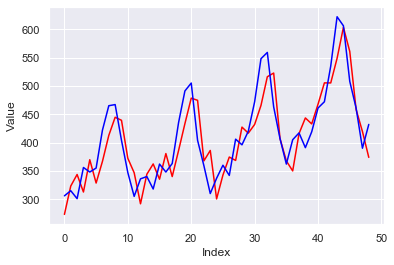

In [95]:
#Plot test vs. prediction values.

plt.plot(predictions,color='red')
plt.plot(test,color='blue')
plt.xlabel('Index')
plt.ylabel('Value')
figsize=(20,15)